In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy

import matplotlib.image as mpl_img

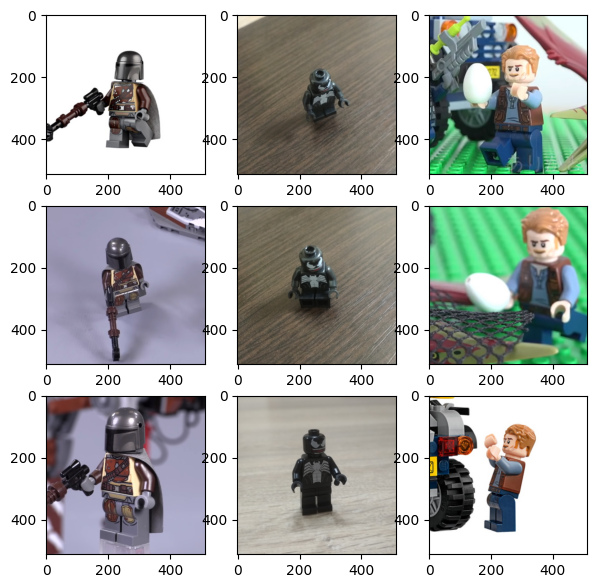

In [2]:
images = [[],[],[]]
index = ['001', '002', '003']

for i in range(3):
    images[i].append(mpl_img.imread('datasets/MINIFIGS/star-wars/0007/' + index[i] + '.jpg'))
    images[i].append(mpl_img.imread('datasets/MINIFIGS/marvel/0002/' + index[i] + '.jpg'))
    images[i].append(mpl_img.imread('datasets/MINIFIGS/jurassic-world/0001/' + index[i] + '.jpg'))

fig, axs = plt.subplots(3,3, figsize=(7,7))

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(images[i][j])

In [3]:
train_set = pd.read_csv('datasets/MINIFIGS/index.csv')
train_set

,path,class_id
0,marvel/0001/001.jpg,1
1,marvel/0001/002.jpg,1
2,marvel/0001/003.jpg,1
3,marvel/0001/004.jpg,1
4,marvel/0001/005.jpg,1
...,...,...
366,star-wars/0017/006.jpg,38
367,star-wars/0017/007.jpg,38
368,star-wars/0017/008.jpg,38
369,star-wars/0017/009.jpg,38


In [4]:
validation_set = pd.read_csv('datasets/MINIFIGS/test.csv')
validation_set

,path,class_id
0,test/001.jpg,32
1,test/002.jpg,32
2,test/003.jpg,32
3,test/004.jpg,32
4,test/005.jpg,1
...,...,...
74,test/075.jpg,37
75,test/076.jpg,37
76,test/077.jpg,38
77,test/078.jpg,38


In [5]:
# Actual Model
mobilenetV2 = tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet')

base_input = mobilenetV2.input
base_output = mobilenetV2.layers[-2].output
output = tf.keras.layers.Dense(38,activation='softmax')(base_output)
#Se crea el modelo final que toma la entrada de MobileNetV2 y produce la salida modificada.
model = tf.keras.Model(inputs = base_input,outputs = output)

#se congelan para que los pesos preentrenados no se modifiquen
for layer in model.layers[:-1]:
    layer.trainable = False

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [8]:

X_train = np.zeros((train_set.shape[0], 224, 224, 3))

for i in range(train_set.shape[0]):
    image = cv2.imread('datasets/MINIFIGS/' + train_set["path"].values[i])
    image = cv2.resize(image, dsize=(224, 224)) # resize in case if image was not 512x512 pixels
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_train[i] = image/255

Y_train = np.array(train_set["class_id"])-1

#===

X_valid = np.zeros((validation_set.shape[0], 224, 224, 3))

for i in range(validation_set.shape[0]):
    image = cv2.imread('datasets/MINIFIGS/' + validation_set["path"].values[i])
    image = cv2.resize(image, dsize=(224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_valid[i] = image/255

Y_valid = np.array(validation_set["class_id"])-1

In [30]:
# Resize training images
X_train_resized = np.zeros((train_set.shape[0], 224, 224, 3))

for i in range(train_set.shape[0]):
    image = cv2.imread('datasets/MINIFIGS/' + train_set["path"].values[i])
    image = cv2.resize(image, dsize=(224, 224))  # Resize to match model input size
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_train_resized[i] = image/255

# Resize validation images
X_valid_resized = np.zeros((validation_set.shape[0], 224, 224, 3))

for i in range(validation_set.shape[0]):
    image = cv2.imread('datasets/MINIFIGS/' + validation_set["path"].values[i])
    image = cv2.resize(image, dsize=(224, 224))  # Resize to match model input size
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_valid_resized[i] = image/255

In [31]:
Y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11,
       11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 23, 23

1/1 [==============================] - 0s 144ms/step
Modelo -  pillow


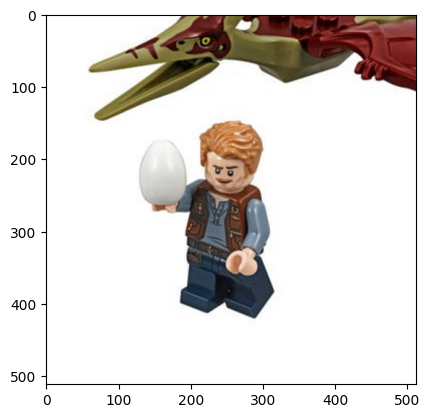

In [28]:
# Lee la imagen
num_imagen = 22

image = cv2.imread('datasets/MINIFIGS/' + validation_set["path"].values[num_imagen])

# Redimensiona la imagen a 224x224 píxeles
resized_img = cv2.resize(image, (224, 224))

# Expande las dimensiones para que coincidan con las expectativas del modelo (añade la dimensión del lote)
input_image = np.expand_dims(resized_img, axis=0)

# Realiza la predicción utilizando el modelo MobileNetV2
prediction = mobilenetV2.predict(input_image)

# Utiliza la función decode_predictions para traducir las salidas de la red neuronal en etiquetas humanamente comprensibles.
decoder = tf.keras.applications.mobilenet_v2.decode_predictions(prediction, top=1)
number, name, probability = decoder[0][0]

# Muestra la predicción
print("Modelo - ", name)

#minifigure = metadata["minifigure_name"][metadata["class_id"] == prediction].iloc[0] # find the name that matches the predicted class
#print(f"Class:\t{prediction}\tMinifigure:\t{minifigure}")


# Muestra la imagen original
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
metadata = pd.read_csv('datasets/MINIFIGS/metadata.csv') # download meta data, there are store real 
                                                                                #names of minifigures

In [29]:
#Model Compilation
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metric = ['accuracy'] # representa la fracción de instancias correctamente clasificadas.

#Después de esta compilación, el modelo estará listo para ser entrenado.
model.compile(optimizer=optim, loss=loss, metrics=metric)

In [32]:
#Model Training

# Número de épocas para entrenar el modelo
epochs = 30

# Configuración de parada temprana para evitar sobreajuste
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',            # Monitorea la pérdida durante el entrenamiento
    patience=3,                 # Número de épocas sin mejora antes de detener el entrenamiento
    verbose=1,                  # Muestra mensajes detallados sobre el proceso de parada temprana
    restore_best_weights=True,  # Restaura los mejores pesos del modelo cuando se detiene
)

'''
# Entrenamiento del modelo 
history = model.fit(
    training_Augmenter,         # Datos de entrenamiento generados por el ImageDataGenerator
    epochs=epochs,              # Número de épocas de entrenamiento
    verbose=1,                  # Muestra mensajes detallados durante el entrenamiento
    callbacks=[early_stopping], # Lista de devoluciones de llamada, en este caso, la parada temprana
)
'''

# Use resized data for training
history = model.fit(
    X_train_resized, # Datos de entrenamiento
    Y_train, 
    validation_data=(X_valid_resized, Y_valid), 
    shuffle=True, 
    batch_size=4, 
    epochs=epochs,              # Número de épocas de entrenamiento
    verbose=1,                  # Muestra mensajes detallados durante el entrenamiento
    callbacks=[early_stopping], # Lista de devoluciones de llamada, en este caso, la parada temprana
)



Epoch 1/30
93/93 [==============================] - 40s 316ms/step - loss: 3.4229 - accuracy: 0.2156 - val_loss: 2.3258 - val_accuracy: 0.2785
Epoch 2/30
93/93 [==============================] - 22s 241ms/step - loss: 0.8812 - accuracy: 0.8410 - val_loss: 1.5673 - val_accuracy: 0.6076
Epoch 3/30
93/93 [==============================] - 28s 304ms/step - loss: 0.3210 - accuracy: 0.9892 - val_loss: 1.1847 - val_accuracy: 0.6962
Epoch 4/30
93/93 [==============================] - 25s 267ms/step - loss: 0.1563 - accuracy: 0.9973 - val_loss: 1.1439 - val_accuracy: 0.7215
Epoch 5/30
93/93 [==============================] - 27s 292ms/step - loss: 0.0941 - accuracy: 1.0000 - val_loss: 1.0180 - val_accuracy: 0.7848
Epoch 6/30
93/93 [==============================] - 33s 355ms/step - loss: 0.0633 - accuracy: 1.0000 - val_loss: 1.0163 - val_accuracy: 0.7468
Epoch 7/30
93/93 [==============================] - 23s 246ms/step - loss: 0.0469 - accuracy: 1.0000 - val_loss: 0.9536 - val_accuracy: 0.7848

In [ ]:
input_preprocessor_mobilenetV2 = tf.keras.applications.mobilenet_v2.preprocess_input

# Preprocesamiento de los datos de prueba utilizando la función de preprocesamiento de MobileNetV2
preprocessed_test_data = input_preprocessor_mobilenetV2(validation_data)

# Evaluación del modelo en los datos de prueba
model.evaluate(preprocessed_test_data, test_labels)
